In [1]:
import numpy as np
import pandas as pd
#inline backened to generate the plots within the browser
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Survey Dataset &  BarGraphs

In [2]:
df = pd.read_csv('Topic_Survey_Assignment.csv' )

In [3]:
df.shape

(6, 4)

In [4]:
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [5]:
df=df.rename(columns={'Unnamed: 0':' '})

##### Sorting the values of VeryInterested columns in descending order

In [6]:
df.sort_values(['Very interested'] ,ascending=False , axis=0, inplace=True)

In [7]:
df.head()

,,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,1688,444,60
5,Machine Learning,1629,477,74
3,Data Visualization,1340,734,102
0,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136


##### Percentages of the columns


In [8]:
#Total respondents=2233

df['%Very interested'] = round(df['Very interested']/2233*100,2)
df['%Somewhat interested'] = round(df['Somewhat interested']/2233*100,2)
df['%Not interested'] = round(df['Not interested']/2233*100,2)

In [9]:
df.head()

,,Very interested,Somewhat interested,Not interested,%Very interested,%Somewhat interested,%Not interested
1,Data Analysis / Statistics,1688,444,60,75.59,19.88,2.69
5,Machine Learning,1629,477,74,72.95,21.36,3.31
3,Data Visualization,1340,734,102,60.01,32.87,4.57
0,Big Data (Spark / Hadoop),1332,729,127,59.65,32.65,5.69
4,Deep Learning,1263,770,136,56.56,34.48,6.09


In [10]:
#Dropping the unnecessary columns
df.drop(columns=['Very interested' ,'Somewhat interested', 'Not interested' ] , inplace=True)

In [11]:
df.head()

,,%Very interested,%Somewhat interested,%Not interested
1,Data Analysis / Statistics,75.59,19.88,2.69
5,Machine Learning,72.95,21.36,3.31
3,Data Visualization,60.01,32.87,4.57
0,Big Data (Spark / Hadoop),59.65,32.65,5.69
4,Deep Learning,56.56,34.48,6.09


##### Use the artist layer of Matplotlib to replicate the bar chart

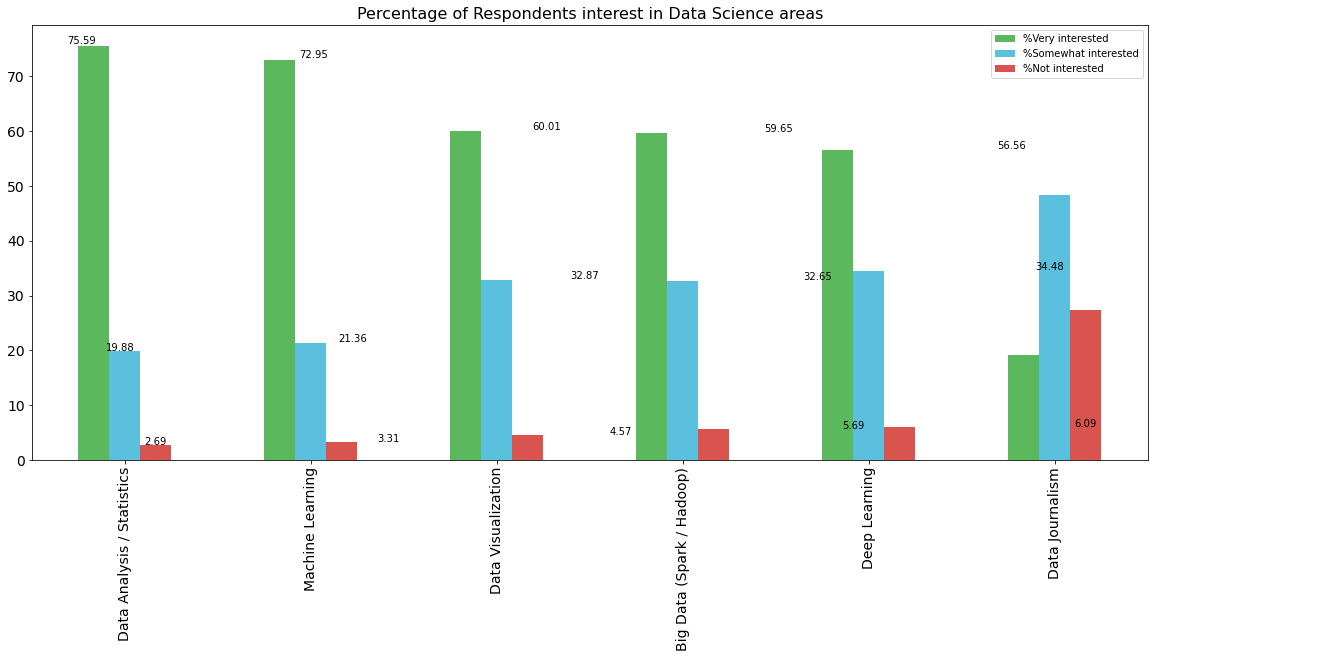

In [12]:
ax = df.plot(kind='bar' , figsize=(20,8) , lw=0.8, fontsize=14 ,color=['#5cb85c' , '#5bc0de' , '#d9534f'])
ax.set_title('Percentage of Respondents interest in Data Science areas',fontsize=16  )

#Annotate row
x_labels=df[' '].unique()
ax.set_xticklabels(x_labels)

for p in ax.patches:

    ax.annotate(str(p.get_height()), (p.get_x() * 1.25, p.get_height() * 1.005))
    
ax.legend()

## 2.Second Datasets 

In [13]:
df1 = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [14]:
df1.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [15]:
df1.shape

(150500, 13)

In [16]:
df1.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [45]:
value_counts = df1['PdDistrict'].value_counts(dropna=True , sort=False)

In [46]:
df_value_counts = pd.DataFrame(value_counts)

In [47]:
type(value_counts)

pandas.core.series.Series

In [48]:
type(df_value_counts)

pandas.core.frame.DataFrame

In [49]:
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Neighborhood', 'Counts']

In [50]:
df_value_counts

,Neighborhood,Counts
0,SOUTHERN,28445
1,NORTHERN,20100
2,INGLESIDE,11594
3,PARK,8699
4,CENTRAL,17666
5,TENDERLOIN,9942
6,TARAVAL,11325
7,BAYVIEW,14303
8,RICHMOND,8922
9,MISSION,19503


## 3. Choropleth maps 

In [51]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [52]:
geo = 'san-francisco.geojson'

In [53]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0done

# All requested packages already installed.



In [54]:
import folium

In [55]:
demo_map = folium.Map(location=[0,0],zoom_start=12)

In [56]:
demo_map

In [58]:
demo_map.choropleth(
    geo_data=geo,
    data=df_value_counts,
    columns=['Neighborhood','Counts'],
    fill_color='YlOrRd',
    line_opacity=0.2,
    legend_name='Crime Rate in San-francisco'
)

In [59]:
demo_map